In [151]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import json

In [152]:
with open('embeddings.json','r') as infile:
  data = json.load(infile)

In [153]:
embedding_labels = list(data.keys())
print(embedding_labels)

['Create a programming language.md', 'Programming languages.md', 'Inspectional reading.md', 'Reading philosophy.md', 'Reading imaginary.md', 'Reading technics should differ depending on book type.md', 'Elementary reading.md', 'Augmented reality.md', 'AR devices.md', 'Mixed reality.md', 'No-code tools for AR.md', 'Video.md', 'Premiere Pro.md', 'Make great videos.md', 'Hyperinflation.md', 'Printing more money could create inflation.md']


In [154]:
embedding_size = len(data[embedding_labels[0]])
print(embedding_size)

1536


In [155]:
embeddings = np.array([data[label] for label in embedding_labels])

### PCA Based Dimensionality Reduction

In [156]:
pca = PCA(n_components=2)

In [157]:
pca.fit(embeddings)

PCA(n_components=2)

In [158]:
pca_encodings = pca.transform(embeddings)
print(pca_encodings)

[[ 0.00353469  0.14331202]
 [-0.01838477  0.15421491]
 [-0.30594297 -0.11086939]
 [-0.27770448 -0.05483695]
 [-0.28002792 -0.1100232 ]
 [-0.30041305 -0.08310953]
 [-0.24006508 -0.10949148]
 [ 0.28609518 -0.26278609]
 [ 0.31822871 -0.20926197]
 [ 0.29171655 -0.25307531]
 [ 0.3259859  -0.04690087]
 [ 0.10556781  0.34823503]
 [ 0.12128157  0.33228369]
 [ 0.07496233  0.3122346 ]
 [-0.03595227 -0.0576436 ]
 [-0.0688822   0.00771813]]


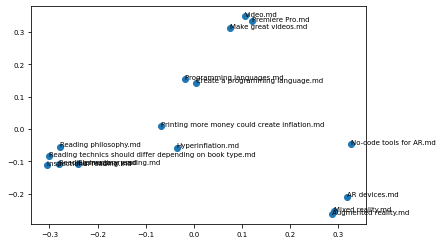

In [159]:
fig, ax = plt.subplots()

x = pca_encodings[:,0]
y = pca_encodings[:,1]

ax.scatter(x, y)
plt.rc('font', size=7)

for i, label in enumerate(embedding_labels):
    ax.annotate(label, (x[i], y[i]))

### Autoencoder Based Dimensionality Reduction

In [202]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(embedding_size,)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(embedding_size//10, activation='sigmoid'))
model.add(tf.keras.layers.Dense(embedding_size//100, activation='sigmoid'))
model.add(tf.keras.layers.Dense(2, activation='sigmoid', name='latent_space'))
model.add(tf.keras.layers.Dense(embedding_size//100, activation='sigmoid'))
model.add(tf.keras.layers.Dense(embedding_size//10, activation='sigmoid'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(embedding_size))

In [203]:
opt = tf.keras.optimizers.SGD(learning_rate=10)
model.compile(optimizer=opt, loss='mse')

In [204]:
X = embeddings.copy()

In [205]:
Y = embeddings.copy()

In [211]:
model.fit(X, Y, epochs=1000, verbose=0)

In [212]:
encoder = tf.keras.Model(inputs=model.input, outputs=model.get_layer('latent_space').output)

In [213]:
nn_encodings = encoder.predict(X)

1/1 [==============================] - 0s 85ms/step


In [214]:
print(nn_encodings)

[[0.30626544 0.5137536 ]
 [0.30811733 0.5147001 ]
 [0.3048698  0.518599  ]
 [0.30495608 0.5183879 ]
 [0.303606   0.51645786]
 [0.30631465 0.5147078 ]
 [0.30781922 0.5191153 ]
 [0.30216745 0.51990056]
 [0.30744806 0.52090377]
 [0.30905613 0.5230448 ]
 [0.3067493  0.5219403 ]
 [0.30211344 0.5216011 ]
 [0.30603766 0.5146374 ]
 [0.30928308 0.52194065]
 [0.30541563 0.52338207]
 [0.3089906  0.5231102 ]]


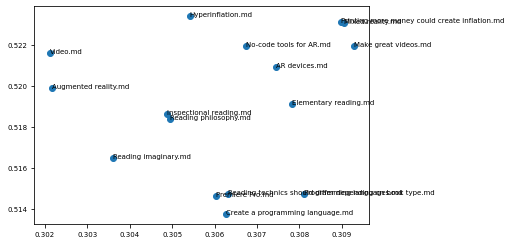

In [215]:
fig, ax = plt.subplots()

x = nn_encodings[:,0]
y = nn_encodings[:,1]

ax.scatter(x, y)
plt.rc('font', size=7)

for i, label in enumerate(embedding_labels):
    ax.annotate(label, (x[i], y[i]))